In [7]:
import numpy
import pandas as pd
data = pd.read_csv('2015_trip_data.csv')


In [8]:
data['starttime'] = pd.DatetimeIndex(data['starttime'])
data['stoptime'] = pd.DatetimeIndex(data['stoptime'])

data['startdayofweek'] = pd.DatetimeIndex(data['starttime']).dayofweek
data['stopdayofweek'] = pd.DatetimeIndex(data['stoptime']).dayofweek


In [9]:
data['startdate'] = pd.DatetimeIndex(data['starttime']).date
data['stopdate'] = pd.DatetimeIndex(data['stoptime']).date

from_grouped_by = data.groupby(['from_station_id', 'startdayofweek']).size()
to_grouped_by = data.groupby(['to_station_id','stopdayofweek']).size()

In [10]:
days_from = data.groupby(['startdayofweek','startdate']).size().reset_index()
days_from = days_from.groupby(['startdayofweek'])['startdate'].count()
days_to = data.groupby(['stopdayofweek','stopdate']).size().reset_index()
days_to = days_to.groupby(['stopdayofweek'])['stopdate'].count()

In [11]:
avg_from = from_grouped_by/days_from
avg_to = to_grouped_by/days_to
avg_diff = avg_to.unstack() - avg_from.unstack()

In [12]:
avg_diff.head()

stopdayofweek,0,1,2,3,4,5,6
to_station_id,,,,,,,
BT-01,-0.283019,-0.942308,0.326923,-0.192308,-1.307692,-0.134615,0.903846
BT-03,-0.811321,-1.557692,-1.826923,-3.019231,-3.576923,-3.230769,-1.596154
BT-04,-1.113208,-1.134615,-0.846154,-1.596154,-1.288462,-0.384615,-0.634615
BT-05,0.132075,0.192308,0.519231,1.038462,-0.346154,-0.019231,0.230769
CBD-03,2.943396,2.750000,3.346154,2.576923,3.346154,2.673077,1.250000


In [13]:
fromdata = from_grouped_by.unstack()
todata = to_grouped_by.unstack()

for i in range(len(days_from)):
    fromdata[i] = fromdata[i]/days_from[i]


for i in range(len(days_to)):
    todata[i] = todata[i]/days_to[i]

stopdayofweek,0,1,2,3,4,5,6
to_station_id,,,,,,,
BT-01,14.924528,12.980769,13.384615,15.211538,16.403846,21.942308,16.403846
BT-03,10.075472,9.865385,10.096154,8.634615,9.057692,8.250000,8.942308
BT-04,6.188679,5.615385,5.730769,5.519231,5.307692,3.884615,3.326923
BT-05,9.566038,9.634615,9.403846,10.576923,9.576923,9.692308,7.884615
CBD-03,11.754717,11.461538,11.865385,11.730769,12.288462,8.615385,8.192308


In [14]:
diff_from_to = to_grouped_by.unstack() - from_grouped_by.unstack()

In [15]:
diff_from_to.head()

stopdayofweek,0,1,2,3,4,5,6
to_station_id,,,,,,,
BT-01,-15.0,-49.0,17.0,-10.0,-68.0,-7.0,47.0
BT-03,-43.0,-81.0,-95.0,-157.0,-186.0,-168.0,-83.0
BT-04,-59.0,-59.0,-44.0,-83.0,-67.0,-20.0,-33.0
BT-05,7.0,10.0,27.0,54.0,-18.0,-1.0,12.0
CBD-03,156.0,143.0,174.0,134.0,174.0,139.0,65.0


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_bar1(df, day, opts):
    """
    :param df.DataFrame df
    :param dict opts: key is plot attribute
    :param day: day (column) to plot
    """
    
    n_groups = len(df.index)
    index = np.arange(n_groups)
    rects1 = plt.bar(index, df[day])
    
    if 'xlabel' in opts:
        plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
        plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
        plt.xticks(index, todata.index)
        _, labels = plt.xticks()
        plt.setp(labels, rotation = 90)
    else:
        labels = ['' for x in todata.index]
        plt.xticks(index, labels)
    if 'ylim' in opts:
        plt.ylim(opts['ylim'])
    if 'title' in opts:
        plt.title(opts['title'])
        

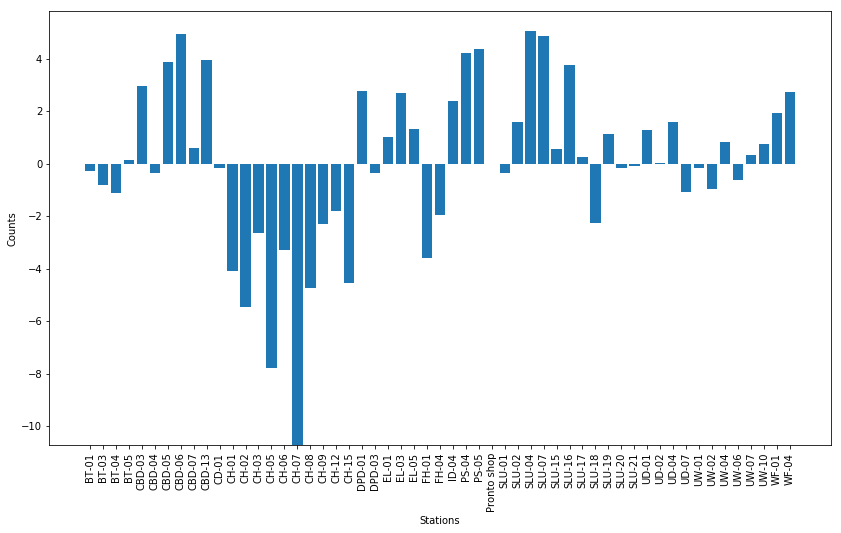

In [23]:
fig = plt.figure(figsize=(14, 8))  # Controls global properties of the bar plot
opts = {'xlabel': 'Stations', 'ylabel': 'Counts', 'xticks': True}
plot_bar1(avg_diff, 0, opts)

In [26]:
def plot_barN(df, variables, opts):

    
    num_columns = len(variables)
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    opts['title'] = days
    local_opts = dict(opts)
    idx = 0
    local_opts['title'] = days
    for var in variables:
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        local_opts['title'] = opts['title'][var]
        if idx == num_columns:
            local_opts['xticks'] = True
            local_opts['xlabel'] = opts['xlabel']

        plt.subplot(num_columns, 1, idx)
        plot_bar1(df, var, local_opts)

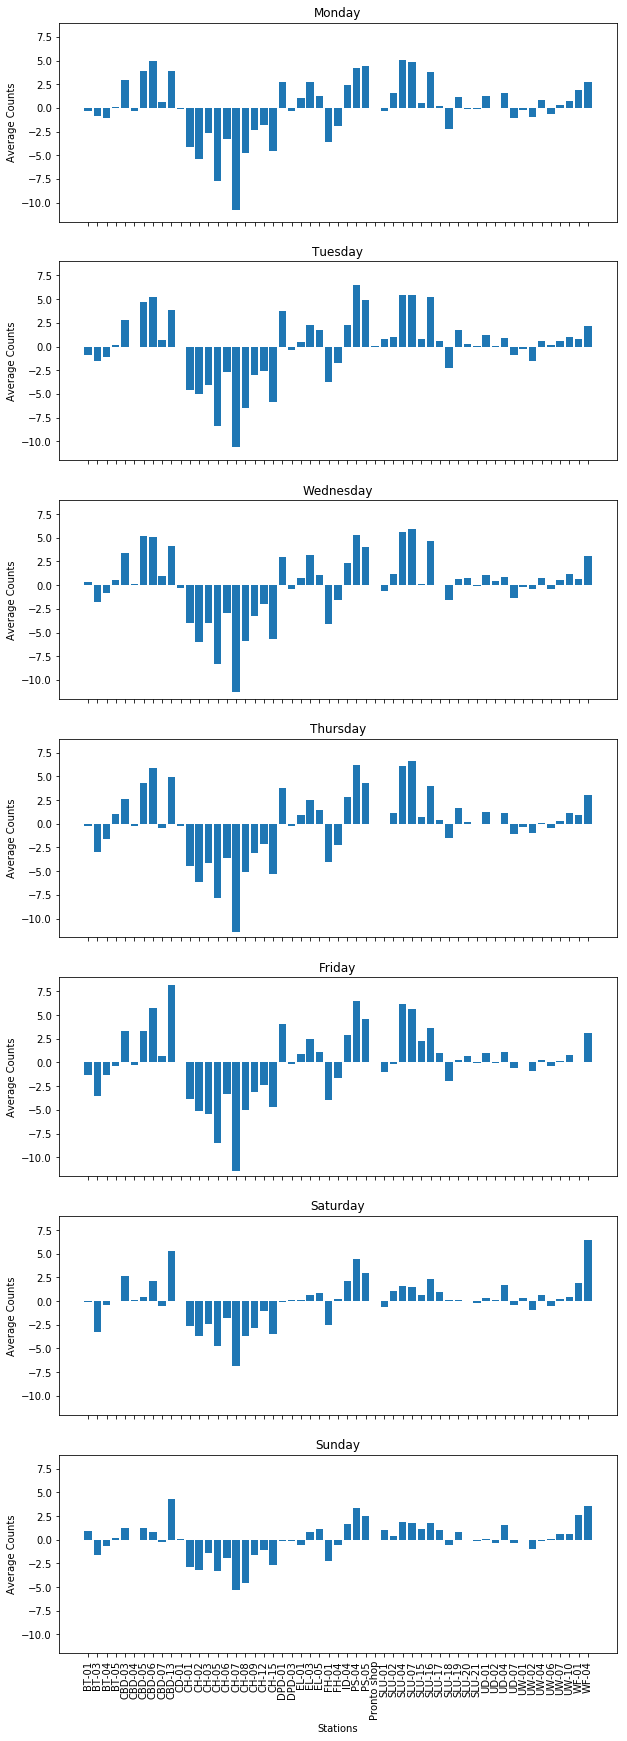

In [27]:
fig = plt.figure(figsize=(10,30))
opts = {'xlabel': 'Stations', 'ylabel': 'Average Counts', 'xticks': True, 'ylim': [round(avg_diff.min() - 1).min(), round(avg_diff.max() + 1).max()]}
plot_barN(avg_diff, range(7), opts)